### PCA of kaviar
* duplicate positons are not removed

In [2]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
kaviar_mat_file = '../data/interim/kaviar.mat'
dat = pd.read_csv(kaviar_mat_file, sep='\t')

/Users/perry/miniconda3/envs/notebook/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
features = [x for x in dat.columns if not x in ('kaviar_status', 'var_type', 'chrom', 'pos', 'ref', 'alt')]

In [ ]:
X = dat[features].values
X = StandardScaler().fit_transform(X)
colors = {'ill':'red',
          'both':'green',
          'cgi':'blue',
          'none':'black'}
status_colors = [colors[x] for x in dat['kaviar_status']]
print('here')
pca = PCA(n_components=2)
p = pca.fit(X)
print(p.explained_variance_ratio_)
X_r = p.transform(X)

plt.figure()
#for x_y, status in zip(X_r, status):
plt.scatter(X_r[:, 0], X_r[:, 1], alpha=.4, c=status_colors)

/Users/perry/miniconda3/envs/notebook/lib/python3.6/site-packages/sklearn/utils/validation.py:444: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


here
[ 0.75983796  0.17039874]


In [6]:
dat[features].head()

,lowmappabilityall,notinlowmappabilityall,siren_similarRegions_dist1,segdupall,notinsegdupall,notinrefseq_union_cds.sort,BadPromoters_gb-2013-14-5-r51-s1
0,1,0,1,1,0,1,0
1,1,0,1,1,0,1,0
2,1,0,1,1,0,1,0
3,1,0,1,1,0,1,0
4,1,0,1,1,0,1,0


In [14]:
dat_cgi = dat[(dat.kaviar_status=='cgi') | (dat.kaviar_status=='both')]
X = dat_cgi[features].values
X = StandardScaler().fit_transform(X)
y = dat_cgi['kaviar_status'].values
colors = {'ill':'red',
          'both':'green',
          'cgi':'blue',
          'none':'black'}
status_colors = [colors[x] for x in dat_cgi['kaviar_status']]
print('here')
lda = LinearDiscriminantAnalysis(n_components=3)
X_r = lda.fit_transform(X, y)
print(X_r[0:5])
plt.figure()
#for x_y, status in zip(X_r, status):
plt.scatter(X_r[:, 0], X_r[:, 1], alpha=.4, c=status_colors)

here
[[ 0.15549171]
 [ 0.15549171]
 [ 1.47903619]
 [ 1.47903619]
 [ 1.47903619]]


IndexError: index 1 is out of bounds for axis 1 with size 1

[ 0.74838216  0.16995372]


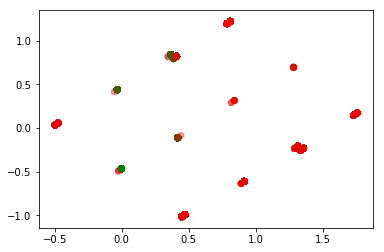

In [9]:
dat_ill = dat[(dat.kaviar_status=='ill') | (dat.kaviar_status=='both')]
X = dat_ill[features].values
colors = {'ill':'red',
          'both':'green',
          'cgi':'blue',
          'none':'black'}
status_colors = [colors[x] for x in dat_ill['kaviar_status']]
pca = PCA(n_components=2)
p = pca.fit(X)
print(p.explained_variance_ratio_)
X_r = p.transform(X)

plt.figure()
#for x_y, status in zip(X_r, status):
plt.scatter(X_r[:, 0], X_r[:, 1], alpha=.4, c=status_colors)

/Users/perry/miniconda3/envs/notebook/lib/python3.6/site-packages/sklearn/utils/validation.py:444: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


[ 0.54144775  0.15265567]


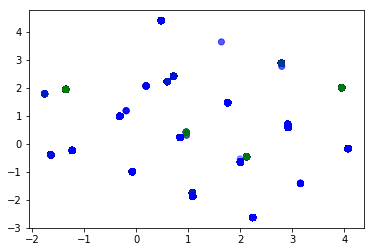

In [6]:
dat_cgi = dat[(dat.kaviar_status=='cgi') | (dat.kaviar_status=='both')]
X = dat_cgi[features].values
X = StandardScaler().fit_transform(X)
colors = {'ill':'red',
          'both':'green',
          'cgi':'blue',
          'none':'black'}
status_colors = [colors[x] for x in dat_cgi['kaviar_status']]
pca = PCA(n_components=2)
p = pca.fit(X)
print(p.explained_variance_ratio_)
X_r = p.transform(X)

plt.figure()
#for x_y, status in zip(X_r, status):
plt.scatter(X_r[:, 0], X_r[:, 1], alpha=.4, c=status_colors)